# 震源メカニズム解の表現

In [1]:
import pygmt

震源メカニズムは辞書形式でデータを渡すのがわかりやすそうです．

In [2]:
meca ={
    "strike"   : [35, 15], 
    "dip"      : [45, 35], 
    "rake"     : [90, 120], 
    "magnitude": [6, 4], 
    "longitude": [135, 140],
    "latitude" : [35, 40], 
    "depth"    : [30, 400]
}

この例のように，`strike, dip, rake` が指定されると自動的にAki and Richardsフォーマットが選択されます．公式マニュアルによると，その他のフォーマットは以下のような辞書項目が設定されていれば良いようです：

| format | dictionary keys |
|:------ |:---------------- |
| `aki`  | `strike`, `dip`, `rake`, `magnitude`  |
| `gcmt`  | `strike1`, `dip1`, `rake1`, `strike2`, `dip2`, `rake2`, `mantissa`, `exponent`  |
| `mt`  | `mrr`, `mtt`, `mff`, `mrt`, `mrf`, `mtf`, `exponent`  |
| `partial`  | `strike1`, `dip1`, `strike2`, `fault_type`, `magnitude`  |
| `principal_axis` | `t_exponent`, `t_azimuth`, `t_plunge`, `n_exponent`, `n_azimuth`, `n_plunge`, `p_exponent`, `p_azimuth`, `p_plunge`, `exponent`  |

複数のメカニズム解を表現したい場合は，辞書のそれぞれのキーに対応する値をリストやタプルにします．同じ構造を持つ辞書全体のリストを一括で処理することはできないようです．（とはいえ，Pythonの `for` 構文と組み合わせればそれは容易に実現できます）


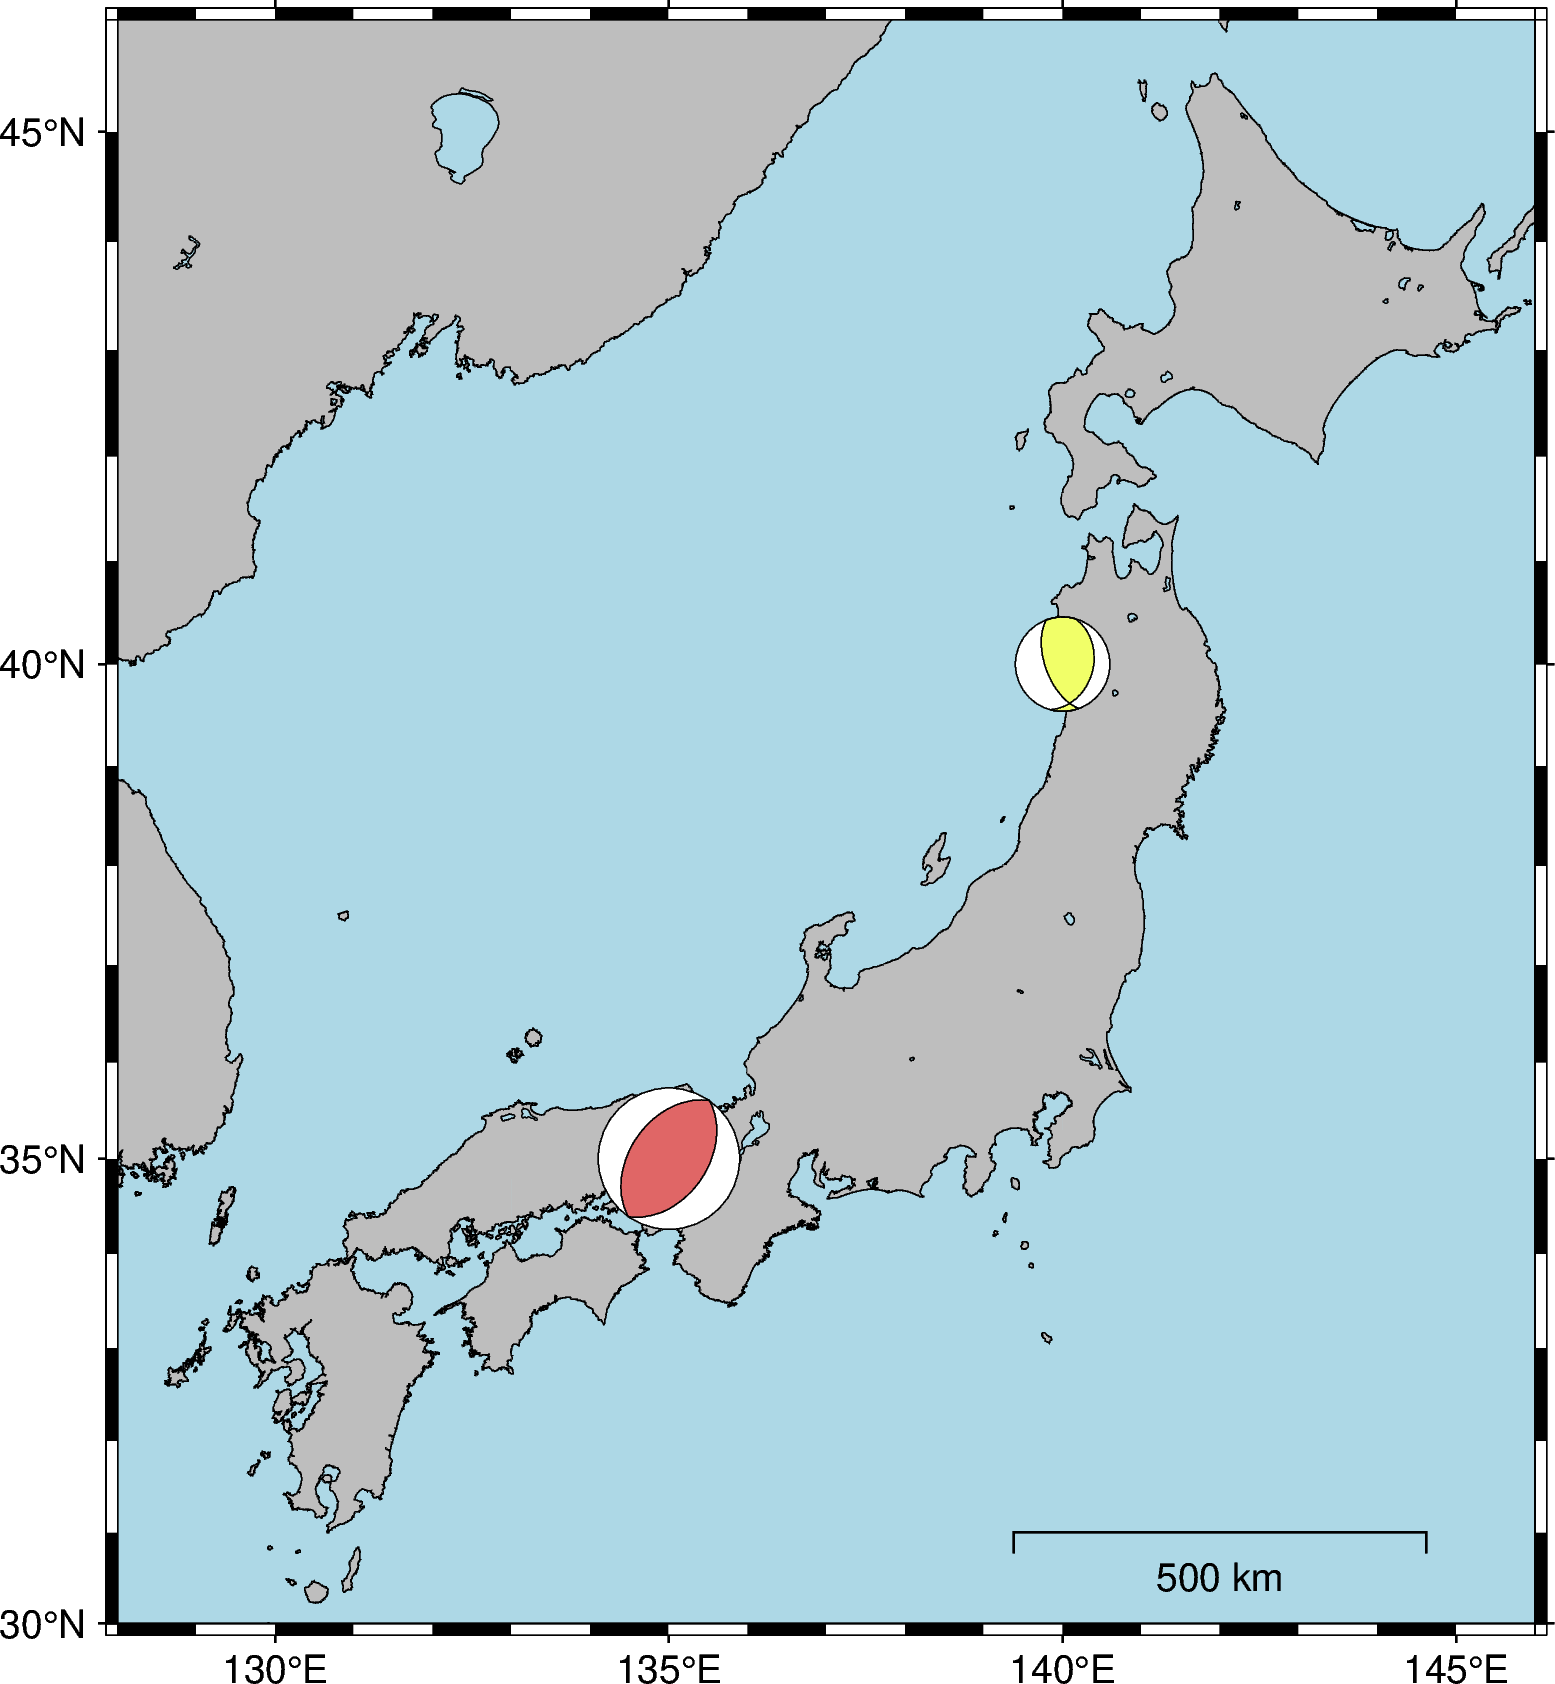

In [5]:
fig = pygmt.Figure()

fig.coast(
    projection  = 'M12c', 
    region      = [128, 146, 30, 46], 
    land        = 'grey', 
    water       = 'lightblue', 
    shorelines  = 'default,black', 
    area_thresh = 10,                           
    resolution  = 'f', 
    frame       = ['WSen', 'xaf', 'yaf'], 
    map_scale   = '142/31/31/500'
)

pygmt.makecpt(
    cmap         = 'seis',       
    series       = [0, 700, 50], 
    background   = True,         
    continuous   = True, 
    transparency = 40, 
)

fig.meca(spec  = meca, 
         scale = '1c', 
         cmap  = True, 
         outline = 'default,black'
)

fig.show()

````{note}
2023年9月公開のPyGMT `v0.10.0` で`meca` モジュールのオプションの実装が進み，GMT本家の `T` オプションに相当する `outline` が実装されて，だいぶ使いやすくなりました．

それ以前のバージョンでは，メカニズム解の押し部分への色塗りをひとつのモジュール呼び出しにまとめることができず，上記のスクリプトの `fig.meca` 部分を，以下のように2段階に分けて書く必要がありました．最新版を使うことをお勧めしますが，旧版をお使いの方のために情報として残しておきます．

```python
fig.meca(spec  = meca, 
         scale = '1c', 
         cmap  = True, 
)

# 節面を描画するにはもういちど fig.meca を `T` オプションをつけて呼ぶ
fig.meca(
    spec  = meca, 
    scale = '1c', 
    pen   = 'default,black', 
    T = '0'
)
```

なお， `meca` の `outline` オプションについては，染谷さん([`@msomeya1`](https://github.com/msomeya1)) にご教示いただきました．記して感謝いたします．

````